In [1]:
import pandas as pd
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

In [16]:
def create_data_set(how_many_points,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(how_many_points):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
    xs = [i for i in range(len(ys))]
    ys = np.array(ys,dtype=np.float)
    xs = np.array(xs,dtype=np.float)
    
    return xs,ys

def slope(x,y):
    slope_val = ((mean(x) * mean(y)) - mean(x*y))/ ((mean(x)**2)-mean(x**2))
    return slope_val
def y_intercept(x,y,slope):
    b = mean(y) - (slope*mean(x))
    return b
def squared_error(y_orig,y_line):
    return sum((y_line-y_orig)**2)

def best_fit_line(xs):
    regression_line = [(m*x) +b for x in xs]
    return regression_line

def coefficient_of_determination(y_orig,y_line):
    """
    # formula is 1 - (squared error regression/ squared_error_mean)
    """
    y_mean_line = [mean(y_orig) for y in y_orig]
    sq_err_reg = squared_error(y_orig,y_line)
    sq_err_mean= squared_error(y_orig,y_mean_line)
    return 1-(sq_err_reg/sq_err_mean)


In [23]:
# x = np.array([1,2,3,4,5,6],dtype=np.float)
# y = np.array([5,4,6,5,6,7],dtype=np.float)
x,y = create_data_set(40,10,2,correlation='pos')

In [24]:
m = slope(x,y)
b = y_intercept(x,y,m)
regression_line = best_fit_line(x)

In [25]:
print("Gradient is {} and y intercept is {}".format(m,b))

Gradient is 1.9440900562851788 and y intercept is 1.1402439024390105


In [26]:
r2_val = coefficient_of_determination(y,regression_line)

In [27]:
print("r2 value is {} ".format(r2_val))

r2 value is 0.9394998187300108 


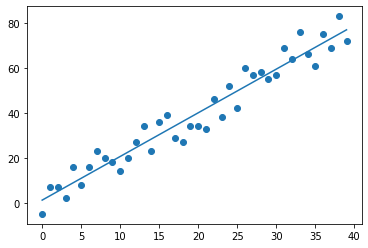

In [28]:
plt.scatter(x,y)
plt.plot(x,regression_line)
plt.show()